### matplotlib的绘图样式style

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


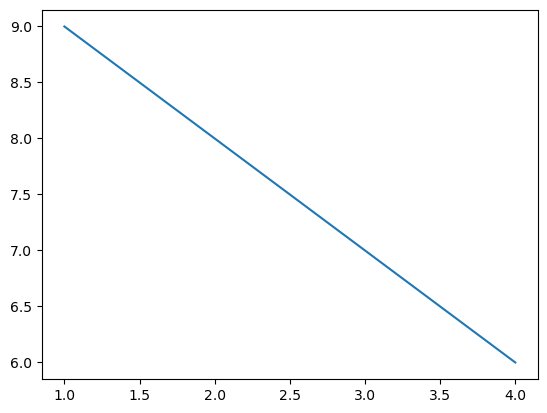

In [2]:
plt.style.use("default")
plt.plot([1,2,3,4],[9,8,7,6])

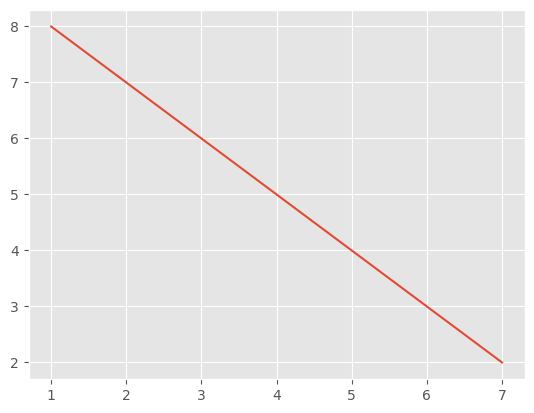

In [3]:
plt.style.use('ggplot')
plt.plot([1,3,5,7],[8,6,4,2])

### matplotlib中的样式设置主要有26种，非常丰富
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 用户也可以自定义styleheet

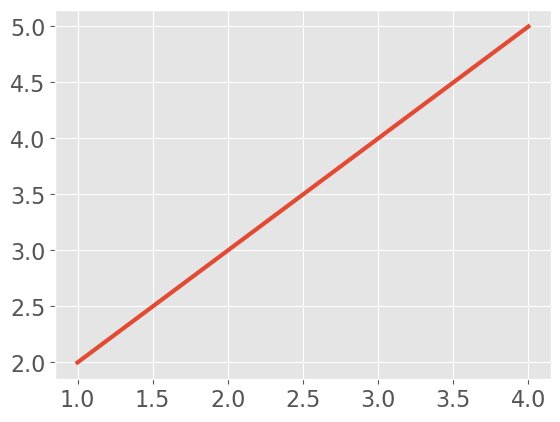

In [7]:
plt.style.use('presentation.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5])

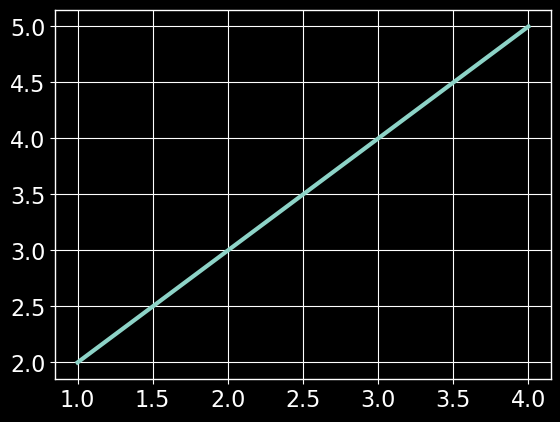

In [8]:
plt.style.use(['dark_background', 'presentation.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5])

### 设置rcparams
#### 将所有rc设置都保存到一个叫做matplotlib.rcParams的变量中

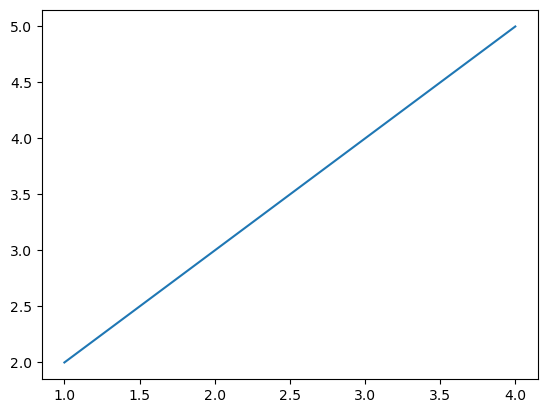

In [9]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1,2,3,4],[2,3,4,5])

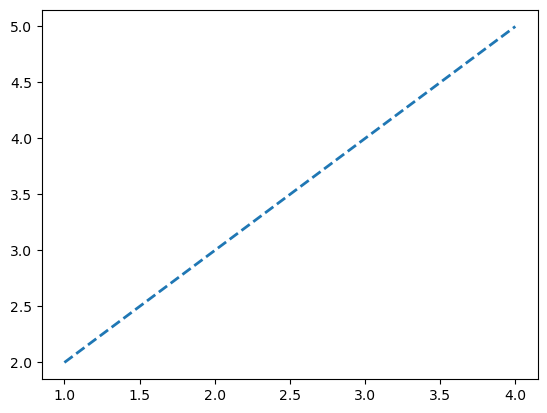

In [10]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5])

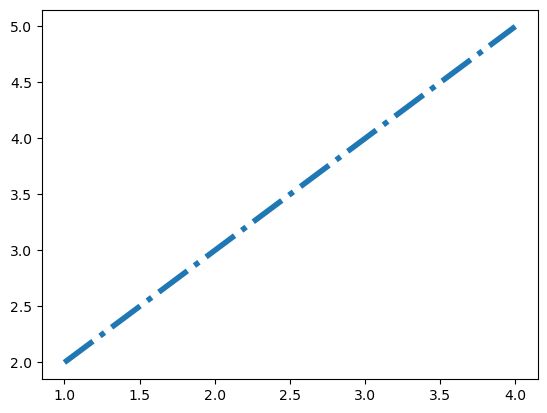

In [11]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5])

### 修改matplotlib文件
#### 这个文件是用来控制matplotlib的样式的，对于样式的设置我们可以自己修改，，使用mpl.matplotlib_fname()可以找到改文件，通过修改改文件可以达到修改样式的作用


### 关于matplotlib的色彩设置color
#### 关于数据图像颜色的设置有集中不同的形式，RGB或RGBA

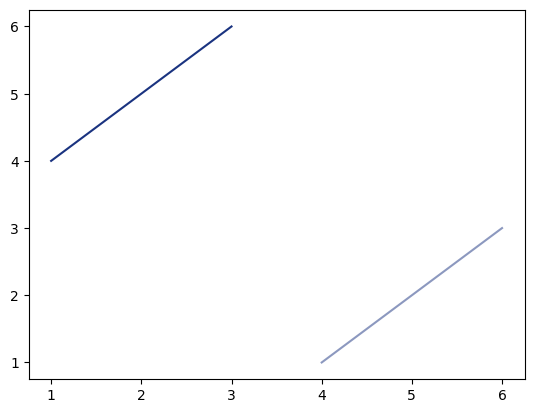

In [12]:
plt.style.use('default')
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5))

- HEX RGB 或 RGBA
用十六进制表示颜色，这里的颜色表示较为全面，可以在网上搜索颜色的十六进制，会有很少多的颜色表示

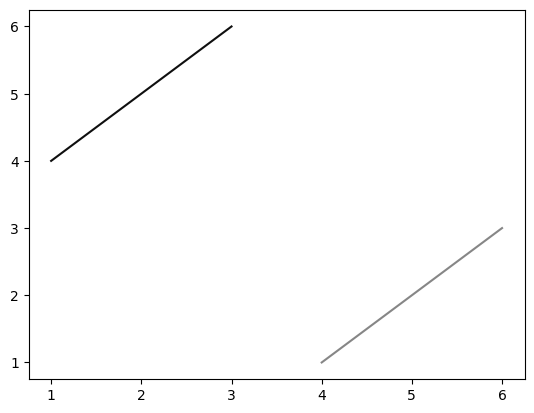

In [13]:
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80')

### 灰度色阶
#### 当颜色的设置只有一个值的时候，就表示灰度色阶

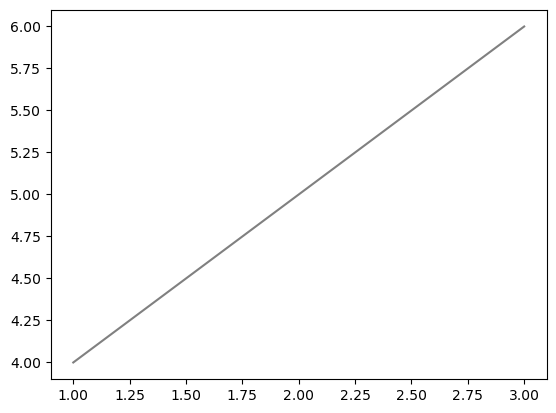

In [14]:
plt.plot([1,2,3],[4,5,6],color='0.5')

### 单字符基本颜色
#### 这里用的就是颜色的英文单词的首字母，（我觉得是的）

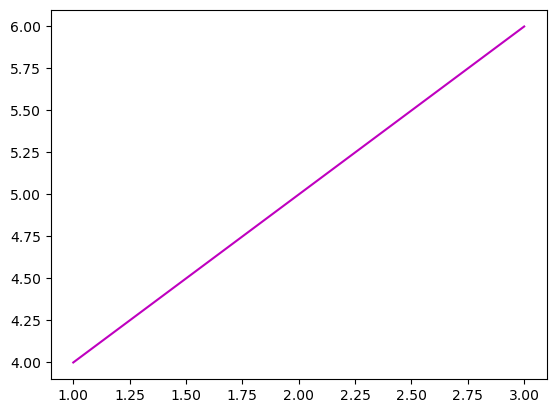

In [15]:
plt.plot([1,2,3],[4,5,6],color='m')

### 颜色名称
#### matplotlib中的颜色对照表

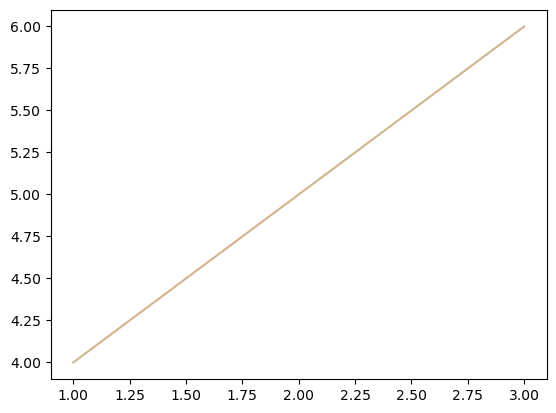

In [16]:
plt.plot([1,2,3],[4,5,6],color='tan')

### 使用colormap设置一组颜色
- 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息
- 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇；当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
- 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
- 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
- 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。


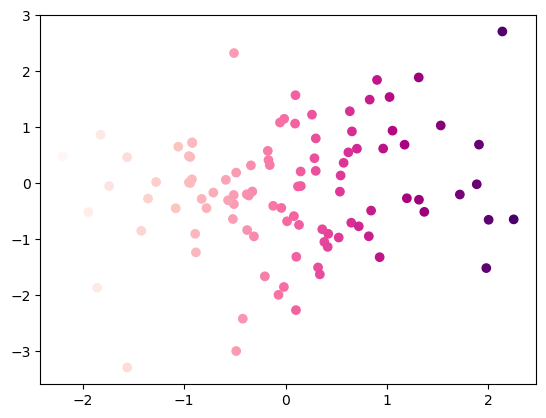

In [18]:
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x,y,c=x,cmap='RdPu')